In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('index.csv')
df.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


<BarContainer object of 904 artists>

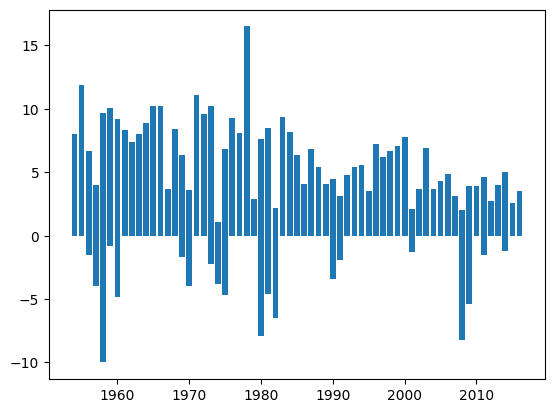

In [8]:
plt.bar(df['Year'], df['Real GDP (Percent Change)'])

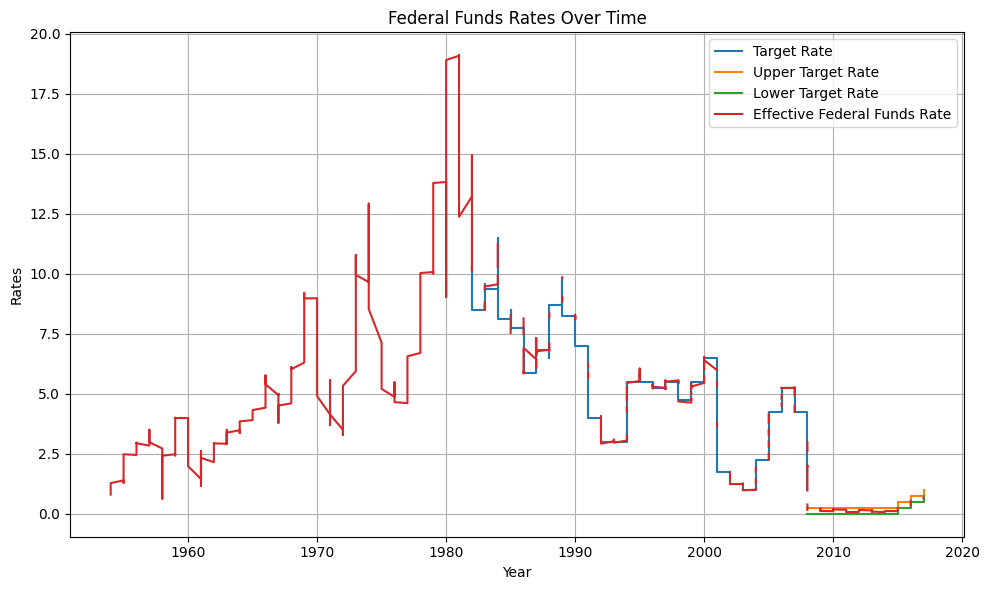

In [15]:
plt.figure(figsize=(10,6))

plt.plot(df['Year'], df['Federal Funds Target Rate'], label='Target Rate')
plt.plot(df['Year'], df['Federal Funds Upper Target'], label='Upper Target Rate')
plt.plot(df['Year'], df['Federal Funds Lower Target'], label='Lower Target Rate')
plt.plot(df['Year'], df['Effective Federal Funds Rate'], label='Effective Federal Funds Rate')

plt.xlabel('Year')
plt.ylabel('Rates')
plt.title('Federal Funds Rates Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

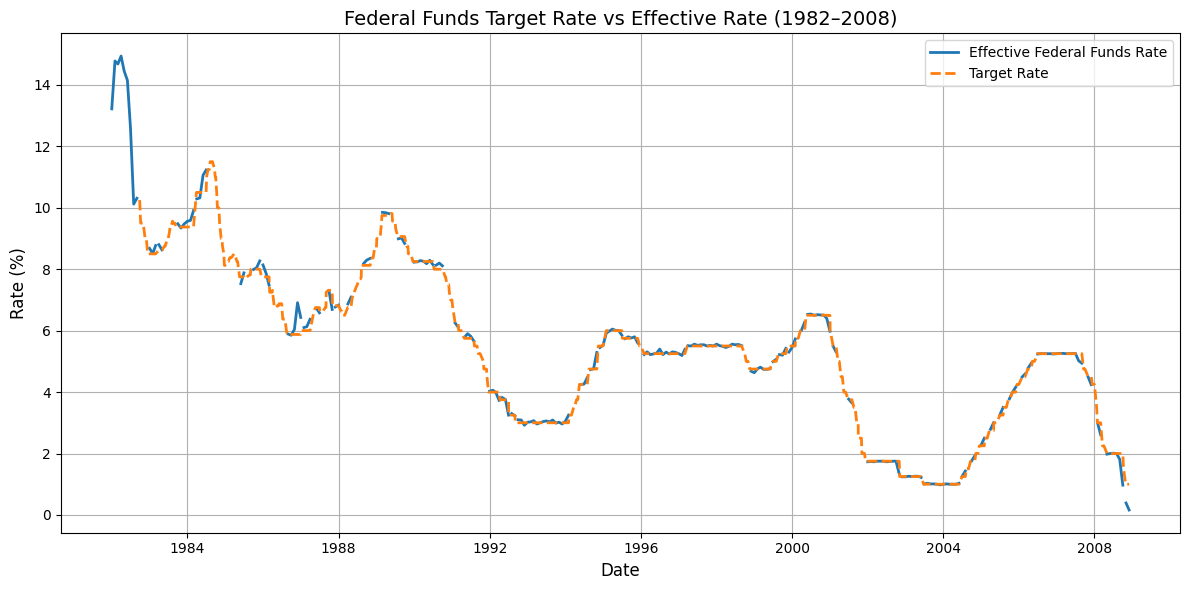

In [17]:
# Create datetime column
df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day), errors="coerce")

# Filter data for 1982–2008
mask = (df["Date"] >= "1982-01-01") & (df["Date"] <= "2008-12-31")
subset = df.loc[mask]

# Plot Effective vs Target Rate
plt.figure(figsize=(12,6))
plt.plot(subset["Date"], subset["Effective Federal Funds Rate"], label="Effective Federal Funds Rate", linewidth=2)
plt.plot(subset["Date"], subset["Federal Funds Target Rate"], label="Target Rate", linewidth=2, linestyle='--')

# Labels & styling
plt.title("Federal Funds Target Rate vs Effective Rate (1982–2008)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Rate (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

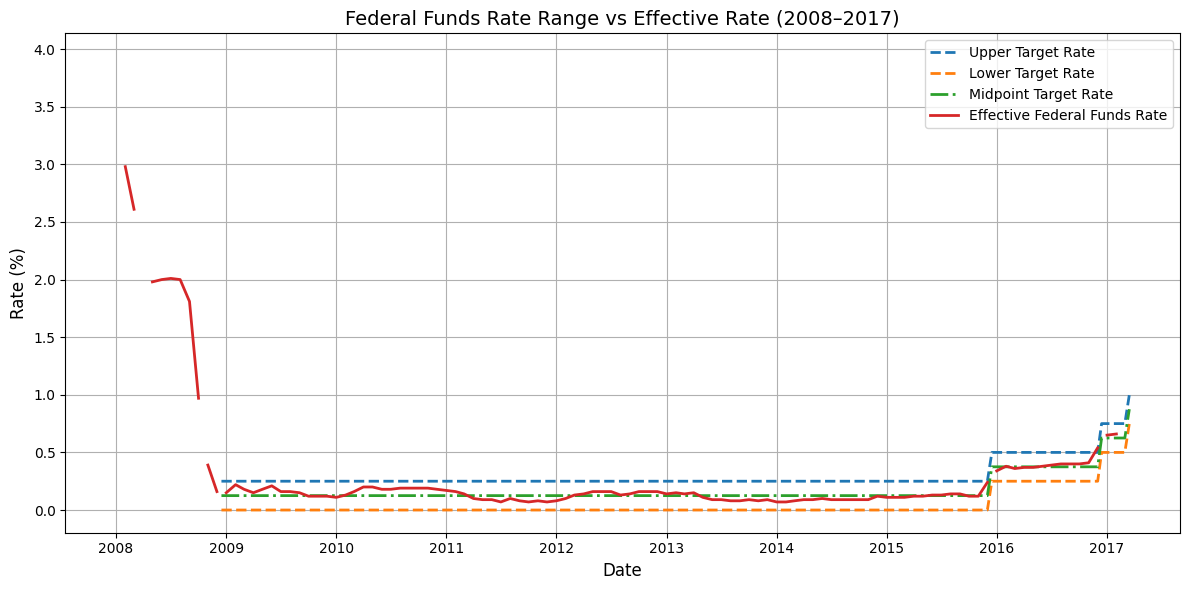

In [19]:
# Filter for 2008–2017
mask = (df["Date"] >= "2008-01-01") & (df["Date"] <= "2017-12-31")
subset = df.loc[mask].copy()

# Calculate midpoint of target range
subset["Midpoint Target Rate"] = (
    subset["Federal Funds Upper Target"] + subset["Federal Funds Lower Target"]
) / 2

# Plot
plt.figure(figsize=(12,6))
plt.plot(subset["Date"], subset["Federal Funds Upper Target"], label="Upper Target Rate", linestyle="--", linewidth=2)
plt.plot(subset["Date"], subset["Federal Funds Lower Target"], label="Lower Target Rate", linestyle="--", linewidth=2)
plt.plot(subset["Date"], subset["Midpoint Target Rate"], label="Midpoint Target Rate", linestyle="-.", linewidth=2)
plt.plot(subset["Date"], subset["Effective Federal Funds Rate"], label="Effective Federal Funds Rate", linewidth=2)

# Styling
plt.title("Federal Funds Rate Range vs Effective Rate (2008–2017)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Rate (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Filter for 2008–2017
mask = (df["Date"] >= "2008-01-01") & (df["Date"] <= "2017-12-31")
subset = df.loc[mask].copy()

# Calculate midpoint
subset["Midpoint"] = (subset["Federal Funds Upper Target"] + subset["Federal Funds Lower Target"]) / 2

# Calculate deviations
subset["Deviation"] = subset["Federal Funds Upper Target"] - subset["Midpoint"]

# Summary statistics
mean_dev = subset["Deviation"].mean()
unique_dev = subset["Deviation"].dropna().unique()

print(f"Average deviation (Upper–Midpoint or Midpoint–Lower): {mean_dev:.4f}%")
print("Unique deviation values observed:", unique_dev)

Average deviation (Upper–Midpoint or Midpoint–Lower): 0.1250%
Unique deviation values observed: [0.125]


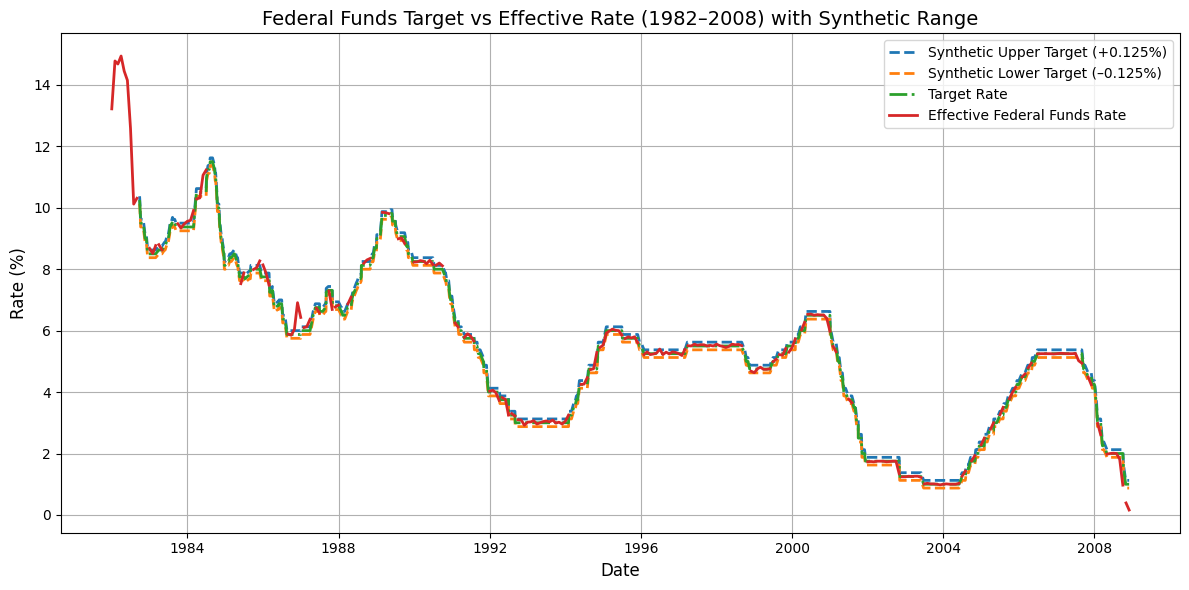

In [34]:
# Filter for 1982–2008
mask = (df["Date"] >= "1982-01-01") & (df["Date"] <= "2008-12-31")
subset = df.loc[mask].copy()

# Create synthetic upper/lower bands around Target Rate (±0.25%)
subset["Synthetic Upper Target"] = subset["Federal Funds Target Rate"] + 0.1250
subset["Synthetic Lower Target"] = subset["Federal Funds Target Rate"] - 0.1250

# Plot Effective, Target, and synthetic range
plt.figure(figsize=(12,6))
plt.plot(subset["Date"], subset["Synthetic Upper Target"], label="Synthetic Upper Target (+0.125%)", linestyle="--", linewidth=2)
plt.plot(subset["Date"], subset["Synthetic Lower Target"], label="Synthetic Lower Target (–0.125%)", linestyle="--", linewidth=2)
plt.plot(subset["Date"], subset["Federal Funds Target Rate"], label="Target Rate", linestyle="-.", linewidth=2)
plt.plot(subset["Date"], subset["Effective Federal Funds Rate"], label="Effective Federal Funds Rate", linewidth=2)

# Styling
plt.title("Federal Funds Target vs Effective Rate (1982–2008) with Synthetic Range", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Rate (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

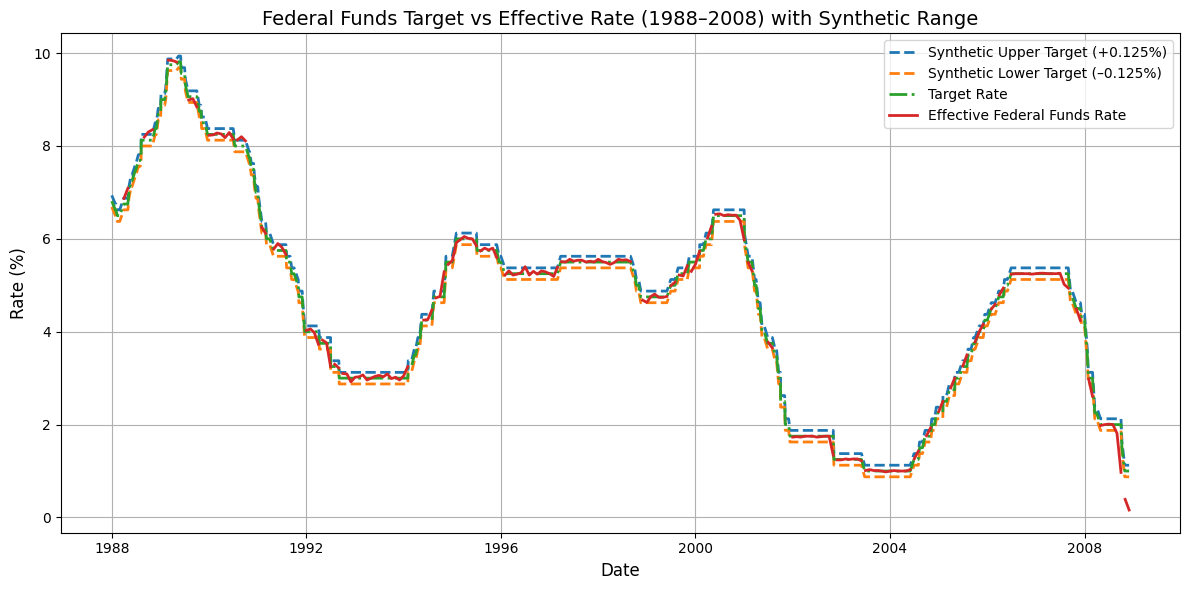

In [33]:
# Filter for 1982–2008
mask = (df["Date"] >= "1988-01-01") & (df["Date"] <= "2008-12-31")
subset = df.loc[mask].copy()

# Create synthetic upper/lower bands around Target Rate (±0.25%)
subset["Synthetic Upper Target"] = subset["Federal Funds Target Rate"] + 0.1250
subset["Synthetic Lower Target"] = subset["Federal Funds Target Rate"] - 0.1250

# Plot Effective, Target, and synthetic range
plt.figure(figsize=(12,6))
plt.plot(subset["Date"], subset["Synthetic Upper Target"], label="Synthetic Upper Target (+0.125%)", linestyle="--", linewidth=2)
plt.plot(subset["Date"], subset["Synthetic Lower Target"], label="Synthetic Lower Target (–0.125%)", linestyle="--", linewidth=2)
plt.plot(subset["Date"], subset["Federal Funds Target Rate"], label="Target Rate", linestyle="-.", linewidth=2)
plt.plot(subset["Date"], subset["Effective Federal Funds Rate"], label="Effective Federal Funds Rate", linewidth=2)

# Styling
plt.title("Federal Funds Target vs Effective Rate (1988–2008) with Synthetic Range", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Rate (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

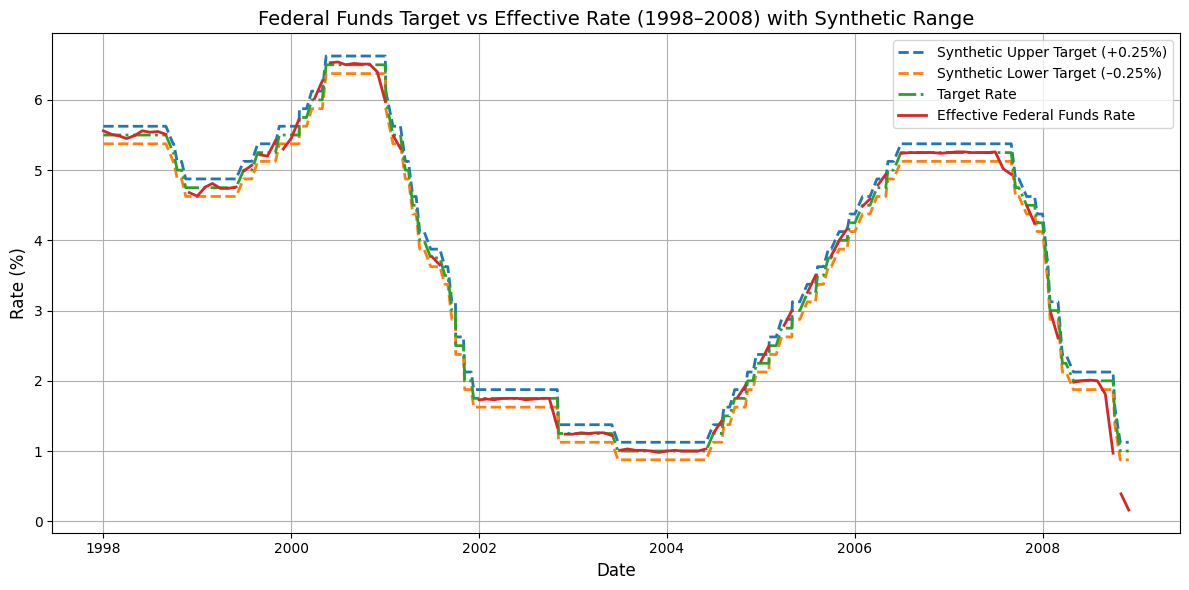

In [27]:
# Filter for 1982–2008
mask = (df["Date"] >= "1998-01-01") & (df["Date"] <= "2008-12-31")
subset = df.loc[mask].copy()

# Create synthetic upper/lower bands around Target Rate (±0.25%)
subset["Synthetic Upper Target"] = subset["Federal Funds Target Rate"] + 0.1250
subset["Synthetic Lower Target"] = subset["Federal Funds Target Rate"] - 0.1250

# Plot Effective, Target, and synthetic range
plt.figure(figsize=(12,6))
plt.plot(subset["Date"], subset["Synthetic Upper Target"], label="Synthetic Upper Target (+0.25%)", linestyle="--", linewidth=2)
plt.plot(subset["Date"], subset["Synthetic Lower Target"], label="Synthetic Lower Target (–0.25%)", linestyle="--", linewidth=2)
plt.plot(subset["Date"], subset["Federal Funds Target Rate"], label="Target Rate", linestyle="-.", linewidth=2)
plt.plot(subset["Date"], subset["Effective Federal Funds Rate"], label="Effective Federal Funds Rate", linewidth=2)

# Styling
plt.title("Federal Funds Target vs Effective Rate (1998–2008) with Synthetic Range", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Rate (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

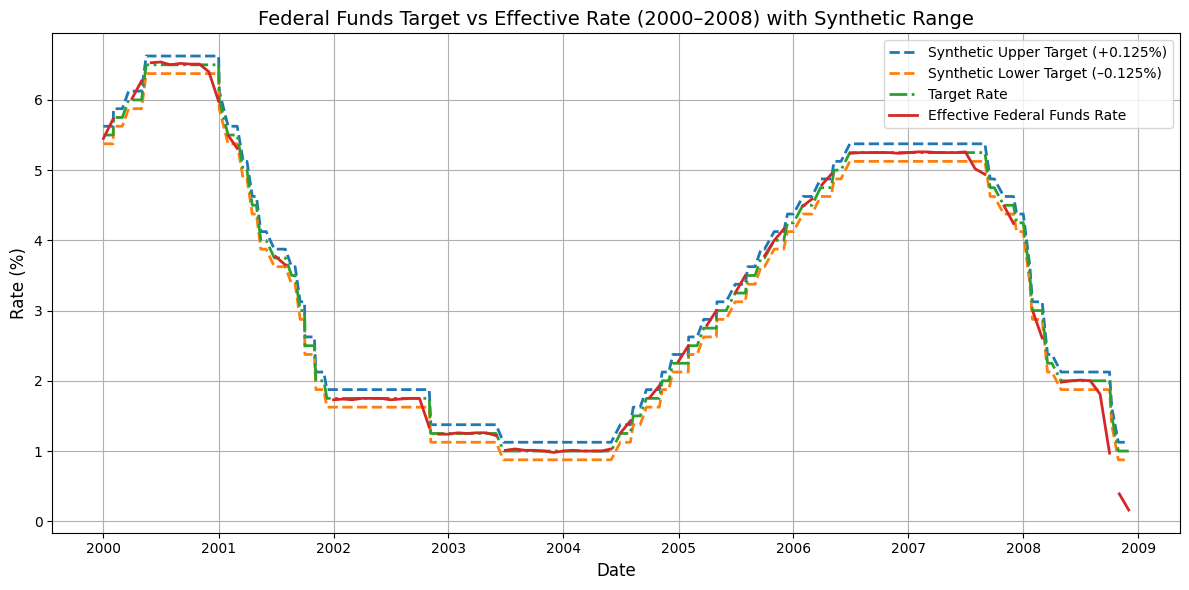

In [32]:
# Filter for 1982–2008
mask = (df["Date"] >= "2000-01-01") & (df["Date"] <= "2008-12-31")
subset = df.loc[mask].copy()

# Create synthetic upper/lower bands around Target Rate (±0.25%)
subset["Synthetic Upper Target"] = subset["Federal Funds Target Rate"] + 0.1250
subset["Synthetic Lower Target"] = subset["Federal Funds Target Rate"] - 0.1250

# Plot Effective, Target, and synthetic range
plt.figure(figsize=(12,6))
plt.plot(subset["Date"], subset["Synthetic Upper Target"], label="Synthetic Upper Target (+0.125%)", linestyle="--", linewidth=2)
plt.plot(subset["Date"], subset["Synthetic Lower Target"], label="Synthetic Lower Target (–0.125%)", linestyle="--", linewidth=2)
plt.plot(subset["Date"], subset["Federal Funds Target Rate"], label="Target Rate", linestyle="-.", linewidth=2)
plt.plot(subset["Date"], subset["Effective Federal Funds Rate"], label="Effective Federal Funds Rate", linewidth=2)

# Styling
plt.title("Federal Funds Target vs Effective Rate (2000–2008) with Synthetic Range", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Rate (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

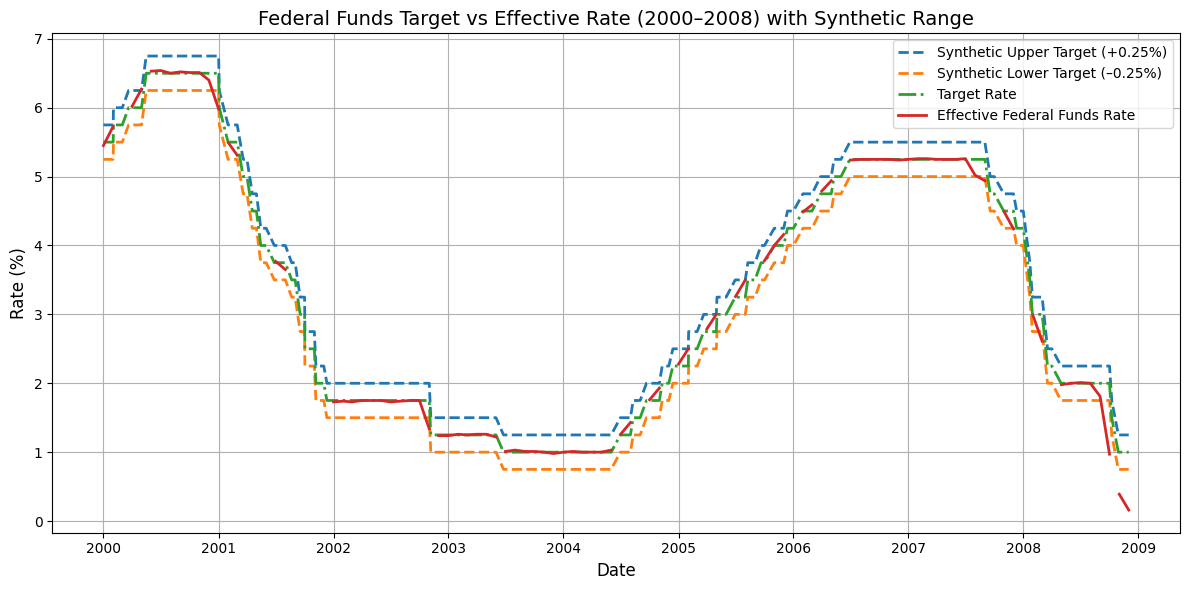

In [31]:
# Filter for 1982–2008
mask = (df["Date"] >= "2000-01-01") & (df["Date"] <= "2008-12-31")
subset = df.loc[mask].copy()

# Create synthetic upper/lower bands around Target Rate (±0.25%)
subset["Synthetic Upper Target"] = subset["Federal Funds Target Rate"] + 0.25
subset["Synthetic Lower Target"] = subset["Federal Funds Target Rate"] - 0.25

# Plot Effective, Target, and synthetic range
plt.figure(figsize=(12,6))
plt.plot(subset["Date"], subset["Synthetic Upper Target"], label="Synthetic Upper Target (+0.25%)", linestyle="--", linewidth=2)
plt.plot(subset["Date"], subset["Synthetic Lower Target"], label="Synthetic Lower Target (–0.25%)", linestyle="--", linewidth=2)
plt.plot(subset["Date"], subset["Federal Funds Target Rate"], label="Target Rate", linestyle="-.", linewidth=2)
plt.plot(subset["Date"], subset["Effective Federal Funds Rate"], label="Effective Federal Funds Rate", linewidth=2)

# Styling
plt.title("Federal Funds Target vs Effective Rate (2000–2008) with Synthetic Range", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Rate (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
# Filter for 1982–2008
mask_pre = (df["Date"] >= "1982-01-01") & (df["Date"] <= "2008-12-31")
pre = df.loc[mask_pre].copy()

# Calculate deviation
pre["Deviation"] = pre["Effective Federal Funds Rate"] - pre["Federal Funds Target Rate"]

# Summary stats
print("=== 1982–2008: Effective vs Target Rate ===")
print(pre["Deviation"].describe())
print(f"\nAverage deviation: {pre['Deviation'].mean():.4f}%")
print(f"Median deviation: {pre['Deviation'].median():.4f}%")
print(f"Standard deviation: {pre['Deviation'].std():.4f}%")

=== 1982–2008: Effective vs Target Rate ===
count    315.000000
mean       0.004778
std        0.212809
min       -1.030000
25%       -0.030000
50%        0.010000
75%        0.070000
max        1.035000
Name: Deviation, dtype: float64

Average deviation: 0.0048%
Median deviation: 0.0100%
Standard deviation: 0.2128%


In [36]:
# Filter for 2008–2017
mask_post = (df["Date"] >= "2008-01-01") & (df["Date"] <= "2017-12-31")
post = df.loc[mask_post].copy()

# Calculate midpoint and deviation
post["Midpoint"] = (post["Federal Funds Upper Target"] + post["Federal Funds Lower Target"]) / 2
post["Deviation"] = post["Effective Federal Funds Rate"] - post["Midpoint"]

# Summary stats
print("\n=== 2008–2017: Effective vs Midpoint of Range ===")
print(post["Deviation"].describe())
print(f"\nAverage deviation: {post['Deviation'].mean():.4f}%")
print(f"Median deviation: {post['Deviation'].median():.4f}%")
print(f"Standard deviation: {post['Deviation'].std():.4f}%")


=== 2008–2017: Effective vs Midpoint of Range ===
count    98.000000
mean      0.006837
std       0.041897
min      -0.055000
25%      -0.035000
50%       0.005000
75%       0.035000
max       0.165000
Name: Deviation, dtype: float64

Average deviation: 0.0068%
Median deviation: 0.0050%
Standard deviation: 0.0419%


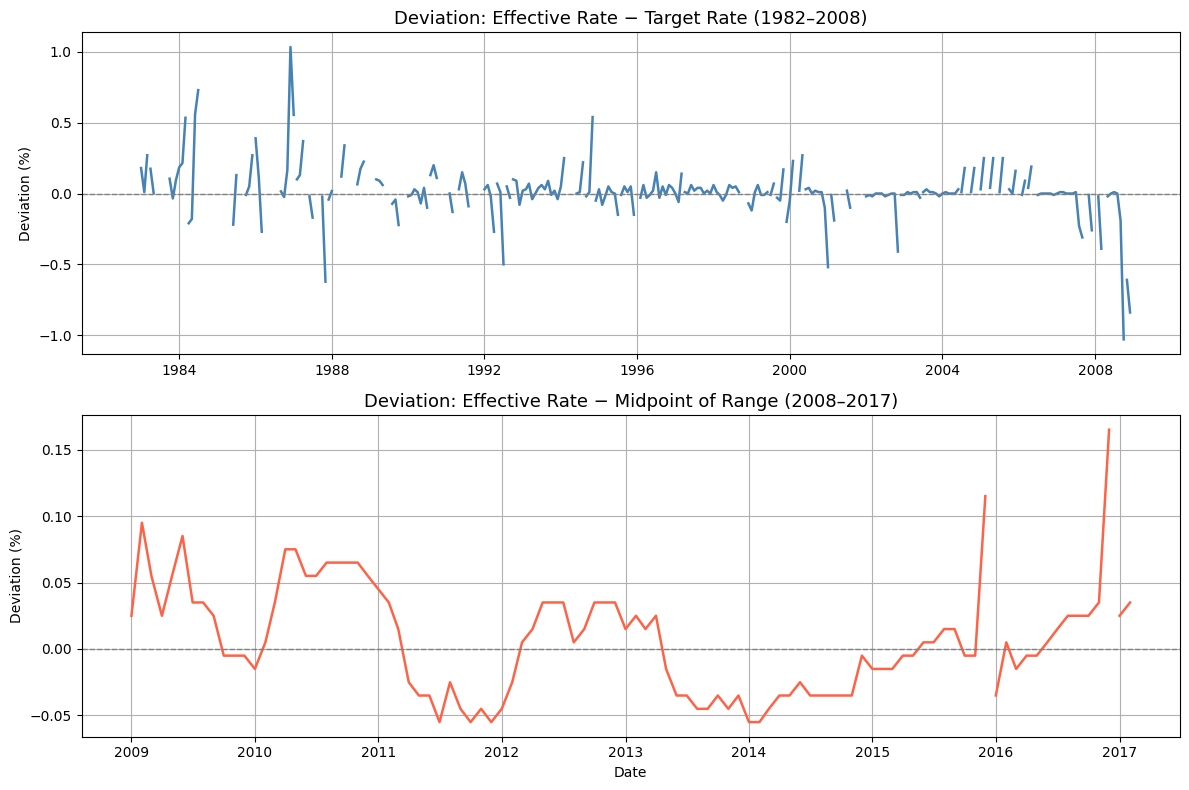

In [37]:
# --- Pre-2008: Effective – Target ---
mask_pre = (df["Date"] >= "1982-01-01") & (df["Date"] <= "2008-12-31")
pre = df.loc[mask_pre].copy()
pre["Deviation"] = pre["Effective Federal Funds Rate"] - pre["Federal Funds Target Rate"]

# --- Post-2008: Effective – Midpoint of Range ---
mask_post = (df["Date"] >= "2008-01-01") & (df["Date"] <= "2017-12-31")
post = df.loc[mask_post].copy()
post["Midpoint"] = (post["Federal Funds Upper Target"] + post["Federal Funds Lower Target"]) / 2
post["Deviation"] = post["Effective Federal Funds Rate"] - post["Midpoint"]

# --- Plot both periods ---
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharey=False)

# 1️⃣ Pre-2008 plot
axes[0].plot(pre["Date"], pre["Deviation"], color="steelblue", linewidth=1.8)
axes[0].axhline(0, color="gray", linestyle="--", linewidth=1)
axes[0].set_title("Deviation: Effective Rate − Target Rate (1982–2008)", fontsize=13)
axes[0].set_ylabel("Deviation (%)")
axes[0].grid(True)

# 2️⃣ Post-2008 plot
axes[1].plot(post["Date"], post["Deviation"], color="tomato", linewidth=1.8)
axes[1].axhline(0, color="gray", linestyle="--", linewidth=1)
axes[1].set_title("Deviation: Effective Rate − Midpoint of Range (2008–2017)", fontsize=13)
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Deviation (%)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

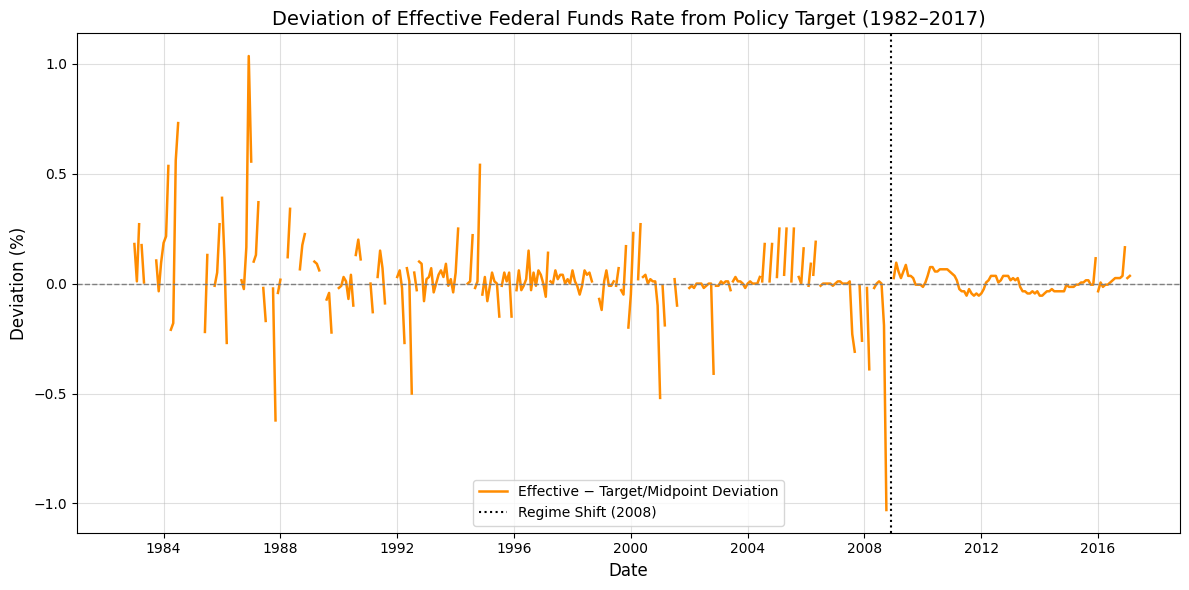

In [38]:
df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day), errors="coerce")

# ---- Compute deviation dynamically ----
def compute_deviation(row):
    if row["Date"] < pd.Timestamp("2008-12-01"):
        # Pre-2008: deviation = Effective − Target
        if pd.notna(row["Federal Funds Target Rate"]) and pd.notna(row["Effective Federal Funds Rate"]):
            return row["Effective Federal Funds Rate"] - row["Federal Funds Target Rate"]
    else:
        # Post-2008: deviation = Effective − Midpoint(Upper, Lower)
        if (
            pd.notna(row["Federal Funds Upper Target"])
            and pd.notna(row["Federal Funds Lower Target"])
            and pd.notna(row["Effective Federal Funds Rate"])
        ):
            midpoint = (row["Federal Funds Upper Target"] + row["Federal Funds Lower Target"]) / 2
            return row["Effective Federal Funds Rate"] - midpoint
    return None

# Apply to entire dataframe
df["Deviation"] = df.apply(compute_deviation, axis=1)

# ---- Filter for 1982-2017 ----
mask = (df["Date"] >= "1982-01-01") & (df["Date"] <= "2017-12-31")
subset = df.loc[mask].copy()

# ---- Plot continuous deviation ----
plt.figure(figsize=(12,6))
plt.plot(subset["Date"], subset["Deviation"], color="darkorange", linewidth=1.8, label="Effective − Target/Midpoint Deviation")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.axvline(pd.Timestamp("2008-12-01"), color="black", linestyle=":", label="Regime Shift (2008)")

plt.title("Deviation of Effective Federal Funds Rate from Policy Target (1982–2017)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Deviation (%)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

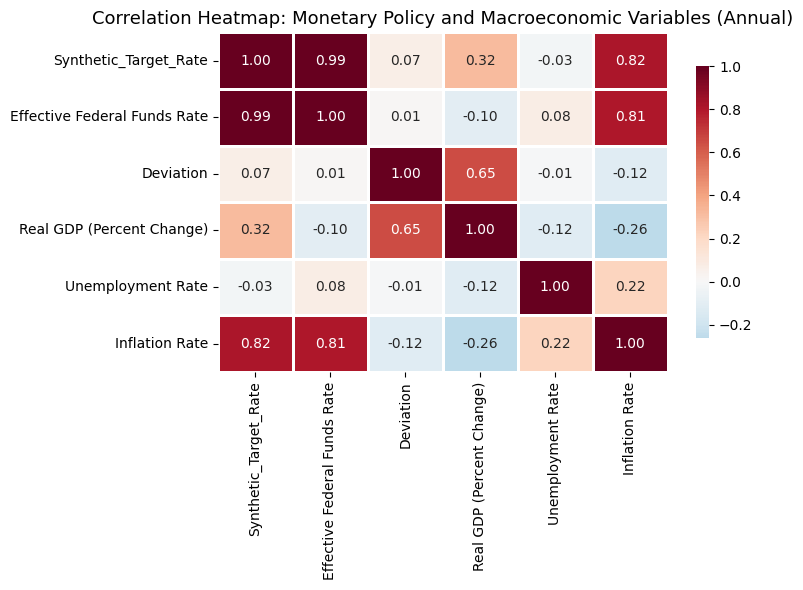

In [40]:
import numpy as np
import seaborn as sns

# ----- Create Synthetic Target & Deviation -----
df["Synthetic_Target_Rate"] = np.where(
    df["Date"] < "2008-12-01",
    df["Federal Funds Target Rate"],
    (df["Federal Funds Upper Target"] + df["Federal Funds Lower Target"]) / 2
)
df["Deviation"] = df["Effective Federal Funds Rate"] - df["Synthetic_Target_Rate"]

# ----- Aggregate to annual level (for inflation modeling) -----
annual = (
    df.groupby("Year")[[
        "Synthetic_Target_Rate",
        "Effective Federal Funds Rate",
        "Deviation",
        "Real GDP (Percent Change)",
        "Unemployment Rate",
        "Inflation Rate"
    ]]
    .mean()
    .reset_index()
)

# ----- Compute correlation matrix -----
corr = annual.drop(columns=["Year"]).corr()

# ----- Plot the heatmap -----
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    linewidths=0.8,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap: Monetary Policy and Macroeconomic Variables (Annual)", fontsize=13)
plt.tight_layout()
plt.show()

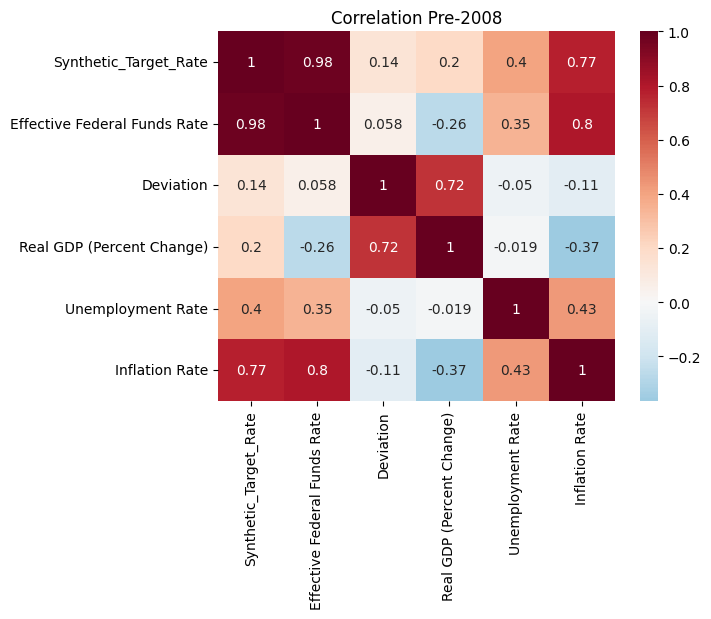

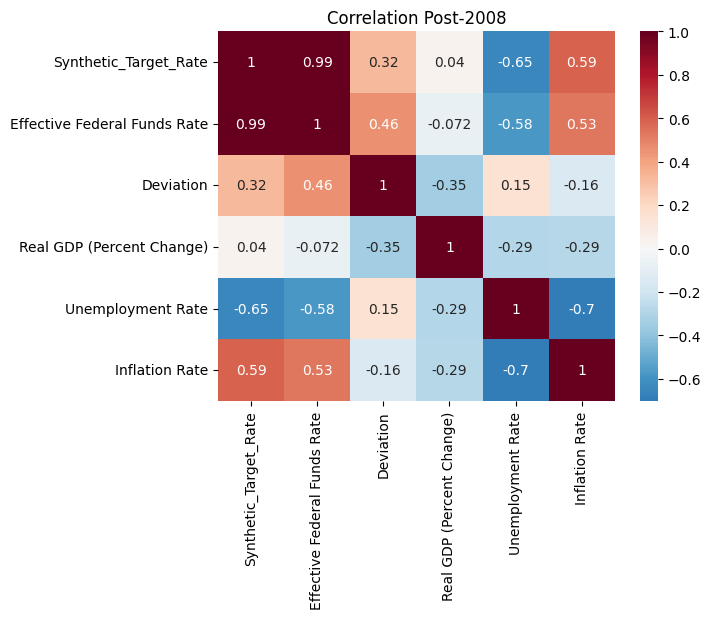

In [41]:
pre = annual[annual["Year"] <= 2008]
post = annual[annual["Year"] > 2008]

sns.heatmap(pre.drop(columns="Year").corr(), annot=True, cmap="RdBu_r", center=0)
plt.title("Correlation Pre-2008")
plt.show()

sns.heatmap(post.drop(columns="Year").corr(), annot=True, cmap="RdBu_r", center=0)
plt.title("Correlation Post-2008")
plt.show()

In [44]:
import pandas as pd

df = pd.read_csv("index.csv")
df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day), errors="coerce")

# Keep only records from 1983 onward
df = df[df["Date"] >= "1983-01-01"].copy()

print("Remaining date range:", df["Date"].min(), "→", df["Date"].max())
print("Remaining rows:", len(df))

# Optional: save filtered version
df.to_csv("index_filtered_1983.csv", index=False)

Remaining date range: 1983-01-01 00:00:00 → 2017-03-16 00:00:00
Remaining rows: 558


In [66]:
df = pd.read_csv("index_filtered_1983.csv")
df.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Date
0,1983,1,1,8.500,NaN,NaN,8.68,5.3,10.4,4.7,1983-01-01
1,1983,2,1,8.500,NaN,NaN,8.51,NaN,10.4,4.7,1983-02-01
2,1983,3,1,8.500,NaN,NaN,8.77,NaN,10.3,4.7,1983-03-01
3,1983,3,31,8.625,NaN,NaN,NaN,NaN,NaN,NaN,1983-03-31
4,1983,4,1,8.625,NaN,NaN,8.80,9.4,10.2,4.3,1983-04-01


In [67]:
df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day), errors="coerce")

# 1️⃣ Filter post-1983
df = df[df["Date"] >= "1983-01-01"]

# 2️⃣ Compute Synthetic Target Rate
cutoff = pd.Timestamp("2008-12-01")
df["Synthetic_Target_Rate"] = np.where(
    df["Date"] < cutoff,
    df["Federal Funds Target Rate"],
    (df["Federal Funds Upper Target"] + df["Federal Funds Lower Target"]) / 2
)

# 3️⃣ Compute Deviation where both exist
df["Deviation"] = df["Effective Federal Funds Rate"] - df["Synthetic_Target_Rate"]

# 4️⃣ Aggregate annually
def compound_percent(series):
    s = series.dropna().astype(float)
    if s.empty:
        return np.nan
    return (np.prod(1 + s / 100) - 1) * 100

annual = (
    df.groupby(df["Date"].dt.year)
    .agg({
        "Effective Federal Funds Rate": "mean",   # Annual mean from available values only
        "Synthetic_Target_Rate": "mean",
        "Deviation": "mean",
        "Real GDP (Percent Change)": "mean",
        "Unemployment Rate": "mean",
        "Inflation Rate": "mean"
    })
    .reset_index()
    .rename(columns={"Date": "Year"})
)

# 5️⃣ Add auxiliary columns
annual["Deviation_abs"] = annual["Deviation"].abs()
annual["is_post_2008"] = (annual["Year"] >= 2008).astype(int)
annual["is_crisis"] = annual["Year"].isin([1987, 1988, 2001, 2002, 2008, 2009]).astype(int)

# 6️⃣ Round to 2 decimals
annual = annual.round(2)

# 7️⃣ Save
annual.to_csv("final_model_data.csv", index=False)
print("✅ Final dataset created: final_model_data.csv")
print(annual.head())

✅ Final dataset created: final_model_data.csv
   Year  Effective Federal Funds Rate  Synthetic_Target_Rate  Deviation  \
0  1983                          9.09                   9.05       0.12   
1  1984                         10.22                  10.15      -0.01   
2  1985                          8.10                   8.04       0.05   
3  1986                          6.80                   6.74       0.07   
4  1987                          6.66                   6.65       0.10   

   Real GDP (Percent Change)  Unemployment Rate  Inflation Rate  \
0                       7.82               9.60            3.93   
1                       5.65               7.51            4.94   
2                       4.28               7.19            4.38   
3                       2.97               7.00            4.06   
4                       4.47               6.18            4.12   

   Deviation_abs  is_post_2008  is_crisis  
0           0.12             0          0  
1           

In [68]:
df = pd.read_csv('final_model_data.csv')
df.head()

,Year,Effective Federal Funds Rate,Synthetic_Target_Rate,Deviation,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Deviation_abs,is_post_2008,is_crisis
0,1983,9.09,9.05,0.12,7.82,9.60,3.93,0.12,0,0
1,1984,10.22,10.15,-0.01,5.65,7.51,4.94,0.01,0,0
2,1985,8.10,8.04,0.05,4.28,7.19,4.38,0.05,0,0
3,1986,6.80,6.74,0.07,2.97,7.00,4.06,0.07,0,0
4,1987,6.66,6.65,0.10,4.47,6.18,4.12,0.10,0,1


In [69]:
df.describe()

,Year,Effective Federal Funds Rate,Synthetic_Target_Rate,Deviation,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Deviation_abs,is_post_2008,is_crisis
count,35.000000,35.000000,35.000000,35.000000,34.000000,35.000000,35.000000,35.00000,35.000000,35.000000
mean,2000.000000,4.013714,3.992286,0.009143,2.868529,6.179429,2.820000,0.05600,0.285714,0.171429
std,10.246951,3.109405,3.076363,0.081615,1.903674,1.543897,1.124264,0.05932,0.458349,0.382385
min,1983.000000,0.090000,0.120000,-0.240000,-2.700000,3.970000,0.960000,0.00000,0.000000,0.000000
25%,1991.500000,0.895000,0.905000,-0.020000,1.885000,5.010000,2.100000,0.02000,0.000000,0.000000
50%,2000.000000,4.200000,4.110000,0.020000,2.750000,5.780000,2.390000,0.03000,0.000000,0.000000
75%,2008.500000,6.040000,5.995000,0.050000,4.310000,7.095000,3.790000,0.06000,1.000000,0.000000
max,2017.000000,10.220000,10.150000,0.180000,7.820000,9.610000,5.020000,0.24000,1.000000,1.000000
